In [1]:
import math
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./cleaned_data/all_variables.csv')
ones = pd.DataFrame(np.ones((len(data), 1)), columns=['intercept'])
data_df = pd.concat((data, ones), axis=1)
data_df

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0
...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0


## Simple regression

In [3]:
model1 = sm.OLS(data_df['urbanization'], data_df[['intercept', 'gas_price']])
res1 = model1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7389
Date:                Wed, 26 May 2021   Prob (F-statistic):              0.392
Time:                        17:10:22   Log-Likelihood:                -313.25
No. Observations:                 112   AIC:                             630.5
Df Residuals:                     110   BIC:                             635.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     81.8584      0.886     92.433      0.0

In [4]:
model2 = sm.OLS(data_df['urbanization'], data_df[['intercept', 'gas_price', 'gdp']])
res2 = model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     50.95
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.38e-16
Time:                        17:10:22   Log-Likelihood:                -276.67
No. Observations:                 112   AIC:                             559.3
Df Residuals:                     109   BIC:                             567.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     74.3860      0.984     75.628      0.0

In [5]:
model3 = sm.OLS(data_df['urbanization'], data_df[['intercept', 'gas_price', 'gdp', 'num_car']])
res3 = model3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     163.1
Date:                Wed, 26 May 2021   Prob (F-statistic):           5.88e-40
Time:                        17:10:23   Log-Likelihood:                -217.85
No. Observations:                 112   AIC:                             443.7
Df Residuals:                     108   BIC:                             454.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     74.6572      0.585    127.671      0.0

In [6]:
model4 = sm.OLS(data_df['urbanization'], data_df[[
                'intercept', 'gas_price', 'gdp', 'num_car', 'oil_consumption']])
res4 = model4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     181.7
Date:                Wed, 26 May 2021   Prob (F-statistic):           9.46e-47
Time:                        17:10:23   Log-Likelihood:                -198.66
No. Observations:                 112   AIC:                             407.3
Df Residuals:                     107   BIC:                             420.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          73.3594      0.532    1

In [7]:
model5 = sm.OLS(data_df['urbanization'], data_df[[
                'intercept', 'gas_price', 'gdp', 'num_car', 'oil_consumption', 'industry']])
res5 = model5.fit()
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     145.0
Date:                Wed, 26 May 2021   Prob (F-statistic):           9.91e-46
Time:                        17:10:23   Log-Likelihood:                -198.32
No. Observations:                 112   AIC:                             408.6
Df Residuals:                     106   BIC:                             425.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          74.4084      1.416     

In [8]:
model6 = sm.OLS(data_df['urbanization'], data_df[[
                'intercept', 'gas_price', 'gdp', 'num_car', 'oil_consumption', 'industry', 'services']])
res6 = model6.fit()
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     119.8
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.20e-44
Time:                        17:10:23   Log-Likelihood:                -198.27
No. Observations:                 112   AIC:                             410.5
Df Residuals:                     105   BIC:                             429.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          73.8619      2.285     

## Include entity and time fixed effects

### Include entity fixed effects, using n-1 regressors

In [9]:
binary = []
for _,c in data_df['country'].iteritems():
    bin_i = [0, 0, 0]
    if(c == 'Canada'):
        bin_i = [1, 0, 0]
    if(c == 'France'):
        bin_i = [0, 1, 0]
    if(c == 'United Kingdom'):
        bin_i = [0, 0, 1]
    binary.append(bin_i)

In [10]:
bin_df = pd.DataFrame(binary, columns=['is_Canada', 'is_France', 'is_UK'])
bin_df

,is_Canada,is_France,is_UK
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
107,0,0,1
108,0,0,1
109,0,0,1
110,0,0,1


In [11]:
data_df2 = pd.concat((data_df, bin_df), axis=1)
data_df2

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,is_Canada,is_France,is_UK
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,0,0,0
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,0,0,0
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,0,0,0
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,0,0,0
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,0,0,1
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,0,0,1
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,0,0,1
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,0,0,1


In [12]:
model7 = sm.OLS(data_df2['urbanization'], data_df2[[
                'intercept', 'gas_price', 'gdp', 'num_car', 'oil_consumption', 'industry', 'services', 'is_Canada', 'is_France', 'is_UK']])
res7 = model7.fit()
print(res7.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     288.2
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.45e-68
Time:                        17:10:24   Log-Likelihood:                -130.25
No. Observations:                 112   AIC:                             280.5
Df Residuals:                     102   BIC:                             307.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          79.6183      3.150     

In [13]:
model8 = sm.OLS(data_df2['urbanization'], data_df2[[
                'intercept', 'gas_price', 'is_Canada', 'is_France', 'is_UK']])
res8 = model8.fit()
print(res8.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     312.5
Date:                Wed, 26 May 2021   Prob (F-statistic):           4.81e-58
Time:                        17:10:24   Log-Likelihood:                -171.38
No. Observations:                 112   AIC:                             352.8
Df Residuals:                     107   BIC:                             366.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     84.5272      0.314    269.189      0.0

### Include time fixed effects, using Year-demeaned

#### Without control variables

In [14]:
urban_mean = data_df2.groupby('country')['urbanization'].mean()
gas_price_mean = data_df2.groupby('country')['gas_price'].mean()

In [15]:
data_df321 = data_df2[['dates', 'country', 'urbanization', 'gas_price']]
for i,r in data_df321.iterrows():
    r['urbanization'] -= urban_mean[r['country']]
    r['gas_price'] -= gas_price_mean[r['country']]
    data_df321.loc[i] = r
data_df321
        

D:\Anaconda\Install\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,dates,country,urbanization,gas_price
0,1992,US,-4.323179,-0.268522
1,1993,US,-3.458179,-0.273805
2,1994,US,-2.627179,-0.271692
3,1995,US,-1.832179,-0.262181
4,1996,US,-1.069179,-0.238934
...,...,...,...,...
107,2015,United Kingdom,2.278250,0.172900
108,2016,United Kingdom,2.538250,-0.058533
109,2017,United Kingdom,2.795250,0.134344
110,2018,United Kingdom,3.050250,0.205770


In [16]:
model9 = sm.OLS(data_df321['urbanization'], data_df321['gas_price'])
res9 = model9.fit()
print(res9.summary())

                                 OLS Regression Results                                
Dep. Variable:           urbanization   R-squared (uncentered):                   0.546
Model:                            OLS   Adj. R-squared (uncentered):              0.542
Method:                 Least Squares   F-statistic:                              133.6
Date:                Wed, 26 May 2021   Prob (F-statistic):                    9.26e-21
Time:                        17:10:25   Log-Likelihood:                         -171.38
No. Observations:                 112   AIC:                                      344.8
Df Residuals:                     111   BIC:                                      347.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### With control variables

In [17]:
urban_mean = data_df2.groupby('country')['urbanization'].mean()
gas_price_mean = data_df2.groupby('country')['gas_price'].mean()
gdp_mean = data_df2.groupby('country')['gdp'].mean()
num_car_mean = data_df2.groupby('country')['num_car'].mean()
oil_mean = data_df2.groupby('country')['oil_consumption'].mean()
ind_mean = data_df2.groupby('country')['industry'].mean()
ser_mean = data_df2.groupby('country')['services'].mean()
# data_df322 = data_df2[['dates', 'country', 'urbanization',
#                        'gas_price', 'gdp', 'num_car', 'oil_consumption', 'industry', 'services']]
data_df322 = data_df2.copy()
for i, r in data_df322.iterrows():
    r['urbanization'] -= urban_mean[r['country']]
    r['gas_price'] -= gas_price_mean[r['country']]
    r['gdp'] -= gdp_mean[r['country']]
    r['num_car'] -= num_car_mean[r['country']]
    r['oil_consumption'] -= oil_mean[r['country']]
    r['industry'] -= ind_mean[r['country']]
    r['services'] -= ser_mean[r['country']]
    data_df322.loc[i] = r
data_df322

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,is_Canada,is_France,is_UK
0,1992,US,-4.323179,-0.268522,-18325.767002,-45.716979,-1829.428571,2.297177,-2.624377,1.0,0,0,0
1,1993,US,-3.458179,-0.273805,-17357.464044,-42.102989,-1637.428571,2.297177,-2.624377,1.0,0,0,0
2,1994,US,-2.627179,-0.271692,-16049.904362,-38.342409,-1163.428571,2.297177,-2.624377,1.0,0,0,0
3,1995,US,-1.832179,-0.262181,-15053.882077,-34.717119,-1163.428571,2.297177,-2.624377,1.0,0,0,0
4,1996,US,-1.069179,-0.238934,-13777.045060,-29.703079,-553.428571,2.297177,-2.624377,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,2.278250,0.172900,9257.042435,1.807143,-130.714286,-2.877840,1.615841,1.0,0,0,1
108,2016,United Kingdom,2.538250,-0.058533,5346.343989,2.407143,-85.714286,-3.438319,2.129850,1.0,0,0,1
109,2017,United Kingdom,2.795250,0.134344,4643.627941,2.807143,-72.714286,-3.456841,2.141610,1.0,0,0,1
110,2018,United Kingdom,3.050250,0.205770,7325.438374,3.107143,-98.714286,-3.500630,2.250809,1.0,0,0,1


In [18]:
model10 = sm.OLS(data_df322['urbanization'], data_df322.drop(
    columns=['dates', 'country', 'urbanization', 'intercept']))
res10 = model10.fit()
print(res10.summary())

                                 OLS Regression Results                                
Dep. Variable:           urbanization   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              41.11
Date:                Wed, 26 May 2021   Prob (F-statistic):                    3.39e-30
Time:                        17:10:25   Log-Likelihood:                         -130.25
No. Observations:                 112   AIC:                                      278.5
Df Residuals:                     103   BIC:                                      303.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

## Nonlinear regression

Text(0, 0.5, 'urbanization')

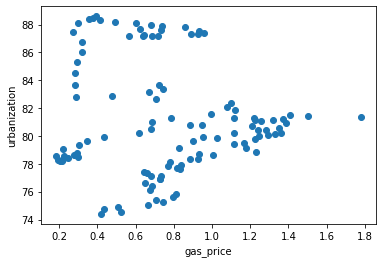

In [19]:
plt.scatter(data_df2['gas_price'], data_df['urbanization'])
plt.xlabel('gas_price')
plt.ylabel('urbanization')

### Polynominals

In [20]:
data_df31 = data_df2.copy()
data_df31.head()

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,is_Canada,is_France,is_UK
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.1321,71.809,1.0,0,0,0
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.1321,71.809,1.0,0,0,0
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.1321,71.809,1.0,0,0,0
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.1321,71.809,1.0,0,0,0
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.1321,71.809,1.0,0,0,0


In [21]:
data_df31['gas_price^2'] = data_df31['gas_price']**2
data_df31['gas_price^3'] = data_df31['gas_price']**3
data_df31

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,is_Canada,is_France,is_UK,gas_price^2,gas_price^3
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,0,0,0,0.082458,0.023678
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,0,0,0,0.079452,0.022395
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,0,0,0,0.080648,0.022903
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,0,0,0,0.086139,0.025282
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,0,0,0,0.100326,0.031777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,0,0,1,0.501648,0.355302
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,0,0,1,0.227374,0.108421
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,0,0,1,0.448518,0.300379
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,0,0,1,0.549289,0.407101


#### Regressions

In [22]:
model11 = sm.OLS(data_df31['urbanization'], data_df31[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_UK']])
res11 = model11.fit()
print(res11.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     281.8
Date:                Wed, 26 May 2021   Prob (F-statistic):           5.15e-70
Time:                        17:10:27   Log-Likelihood:                -119.55
No. Observations:                 112   AIC:                             263.1
Df Residuals:                     100   BIC:                             295.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          81.4519      2.979     

#### Hypothesis tests

In [23]:
u11 = res11.resid
SSR011 = u11.T@u11

In [24]:
model12 = sm.OLS(data_df31['urbanization'], data_df31[[
                 'intercept', 'gas_price', 'gdp', 'num_car', 'oil_consumption', 'industry', 'services',
                 'is_Canada', 'is_France', 'is_UK']])
res12 = model12.fit()
print(res12.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     288.2
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.45e-68
Time:                        17:10:27   Log-Likelihood:                -130.25
No. Observations:                 112   AIC:                             280.5
Df Residuals:                     102   BIC:                             307.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          79.6183      3.150     

In [25]:
u12 = res12.resid
SSR012 = u12.T@u12

In [26]:
from scipy.stats import f
data_df312 = data_df31[['intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 'industry', 'services',
                        'is_Canada', 'is_France', 'is_UK']]
n, k = np.shape(data_df312)
F312 = ((SSR012 - SSR011)/2)/(SSR011/(n - k))
f.sf(F312, 2, n-k)

7.06987852426835e-05

**P-value = 7e-5, we reject the null joint hypothesis that both squared gas_price and cubic gas_price are zeros at significant level 5%.**

#### Include interaction effects

We will build a binary variables is_USA, is_USA = 1 if num_car > 40, otherwise is_USA = 0. We will consider the interaction effects between the change in number of cars and the change of gas price.

In [27]:
data_df31['is_USA'] = 0
for i,r in data_df31.iterrows():
    if(r['num_car'] > 40):
        data_df31['is_USA'][i] = 1
data_df31

<ipython-input-27-fec8d9cbdfe8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df31['is_USA'][i] = 1


,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,is_Canada,is_France,is_UK,gas_price^2,gas_price^3,is_USA
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,0,0,0,0.082458,0.023678,1
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,0,0,0,0.079452,0.022395,1
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,0,0,0,0.080648,0.022903,1
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,0,0,0,0.086139,0.025282,1
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,0,0,0,0.100326,0.031777,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,0,0,1,0.501648,0.355302,0
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,0,0,1,0.227374,0.108421,0
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,0,0,1,0.448518,0.300379,0
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,0,0,1,0.549289,0.407101,0


In [28]:
data_df31['is_USA X gas_price'] = data_df31['is_USA']*data_df31['gas_price']
data_df31['is_USA X gas_price^2'] = data_df31['is_USA']*data_df31['gas_price^2']
data_df31['is_USA X gas_price^3'] = data_df31['is_USA']*data_df31['gas_price^3']
data_df31

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,is_Canada,is_France,is_UK,gas_price^2,gas_price^3,is_USA,is_USA X gas_price,is_USA X gas_price^2,is_USA X gas_price^3
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,0,0,0,0.082458,0.023678,1,0.287155,0.082458,0.023678
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,0,0,0,0.079452,0.022395,1,0.281872,0.079452,0.022395
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,0,0,0,0.080648,0.022903,1,0.283985,0.080648,0.022903
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,0,0,0,0.086139,0.025282,1,0.293495,0.086139,0.025282
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,0,0,0,0.100326,0.031777,1,0.316742,0.100326,0.031777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,0,0,1,0.501648,0.355302,0,0.000000,0.000000,0.000000
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,0,0,1,0.227374,0.108421,0,0.000000,0.000000,0.000000
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,0,0,1,0.448518,0.300379,0,0.000000,0.000000,0.000000
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,0,0,1,0.549289,0.407101,0,0.000000,0.000000,0.000000


In [29]:
model13 = sm.OLS(data_df31['urbanization'], data_df31[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'is_USA', 'oil_consumption', 'industry', 'services',
                 'is_Canada', 'is_France', 'is_USA X gas_price', 'is_USA X gas_price^2', 'is_USA X gas_price^3']])
res13 = model13.fit()
print(res13.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     230.8
Date:                Wed, 26 May 2021   Prob (F-statistic):           7.79e-68
Time:                        17:10:28   Log-Likelihood:                -115.64
No. Observations:                 112   AIC:                             261.3
Df Residuals:                      97   BIC:                             302.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               86.8621 

### Logarithm (optional)

## Improvement based on Laurie's suggestions

### Check the results of Year-demeamed method, using 'fixed effects' form

In [30]:
bin_year = []
for _, y in data_df2['dates'].iteritems():
    if(y <= 1998):
        bin_year_i = [0,0,0]
    if(1999 <= y <= 2005):
        bin_year_i = [1,0,0]
    if(2006 <= y <= 2012):
        bin_year_i = [0,1,0]
    if(2013 <= y <= 2019):
        bin_year_i = [0,0,1]
    bin_year.append(bin_year_i)
bin_year = np.array(bin_year)
bin_year

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0,

In [31]:
year_df = pd.DataFrame(bin_year, columns=['1999_2005', '2006_2012', '2013_2019'])
year_df

,1999_2005,2006_2012,2013_2019
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
107,0,0,1
108,0,0,1
109,0,0,1
110,0,0,1


In [32]:
data_df41 = pd.concat((data_df2, year_df), axis = 1)
data_df41

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,is_Canada,is_France,is_UK,1999_2005,2006_2012,2013_2019
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,0,0,0,0,0,0
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,0,0,0,0,0,0
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,0,0,0,0,0,0
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,0,0,0,0,0,0
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,0,0,1,0,0,1
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,0,0,1,0,0,1
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,0,0,1,0,0,1
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,0,0,1,0,0,1


In [33]:
model14 = sm.OLS(data_df41['urbanization'], data_df41.drop(columns=['dates',
                                                                    'country', 'urbanization']))
res14 = model14.fit()
print(res14.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     289.3
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.41e-71
Time:                        17:10:29   Log-Likelihood:                -112.84
No. Observations:                 112   AIC:                             251.7
Df Residuals:                      99   BIC:                             287.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
gas_price           1.3746      0.450     

#### Hypothesis tests

In [34]:
u14 = res14.resid
SSR014 = u14.T@u14

##### is_Canada = is_France = is_UK = 0

In [35]:
model142 = sm.OLS(data_df41['urbanization'], data_df41.drop(columns=['dates', 'is_Canada', 'is_France', 'is_UK',
                                                                    'country', 'urbanization']))
res142 = model142.fit()
print(res142.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.02e-49
Time:                        17:10:29   Log-Likelihood:                -177.53
No. Observations:                 112   AIC:                             375.1
Df Residuals:                     102   BIC:                             402.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
gas_price          -1.6299      0.555     

In [36]:
u142 = res142.resid
SSR1142 = u142.T@u142

In [37]:
n142, k142 = np.shape(data_df41.drop(columns=['dates',
                                              'country', 'urbanization']))
F142 = ((SSR1142 - SSR014)/2)/(SSR014/(n142 - k142))
p142 = f.sf(F142, 3, n142-k142)
print('F: {}, p-value: {}'.format(F142, p142))

F: 107.64952891939689, p-value: 4.784868983904253e-31


##### 1999_2005 = 2006_2012 = 2013_2019 = 0

In [38]:
model143 = sm.OLS(data_df41['urbanization'], data_df41.drop(columns=['dates', '1999_2005', '2006_2012', '2013_2019',
                                                                    'country', 'urbanization']))
res143 = model143.fit()
print(res143.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     288.2
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.45e-68
Time:                        17:10:29   Log-Likelihood:                -130.25
No. Observations:                 112   AIC:                             280.5
Df Residuals:                     102   BIC:                             307.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
gas_price           2.2282      0.485     

In [39]:
u143 = res143.resid
SSR1143 = u143.T@u143

In [40]:
n143, k143 = np.shape(data_df41.drop(columns=['dates',
                                              'country', 'urbanization']))
F143 = ((SSR1143 - SSR014)/2)/(SSR014/(n143 - k143))
p143 = f.sf(F143, 3, n143-k143)
print('F: {}, p-value: {}'.format(F143, p143))

F: 18.049757874910622, p-value: 2.021519276962252e-09


##### All fixed effects = 0

In [41]:
u144 = res6.resid
SSR1144 = u144.T@u144

In [42]:
n144, k144 = np.shape(data_df41.drop(columns=['dates',
                                              'country', 'urbanization']))
F144 = ((SSR1144 - SSR014)/2)/(SSR014/(n144 - k144))
p144 = f.sf(F144, 6, n144-k144)
print('F: {}, p-value: {}'.format(F144, p144))

F: 178.08425308590378, p-value: 9.847416681754428e-51


### Rerun from Model 11 to the end

In [43]:
data_df41[['gas_price^2', 'gas_price^3']] = data_df31[['gas_price^2', 'gas_price^3']]
model11 = sm.OLS(data_df41['urbanization'], data_df41[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_UK', '1999_2005', '2006_2012', '2013_2019']])
res11 = model11.fit()
print(res11.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     280.6
Date:                Wed, 26 May 2021   Prob (F-statistic):           7.90e-72
Time:                        17:10:30   Log-Likelihood:                -104.98
No. Observations:                 112   AIC:                             240.0
Df Residuals:                      97   BIC:                             280.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          79.6483      2.879     

In [44]:
model112 = sm.OLS(data_df41['urbanization'], data_df41[[
                 'intercept', 'gas_price', 'gas_price^2', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_UK', '1999_2005', '2006_2012', '2013_2019']])
res112 = model112.fit()
print(res112.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     266.7
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.75e-70
Time:                        17:10:30   Log-Likelihood:                -112.36
No. Observations:                 112   AIC:                             252.7
Df Residuals:                      98   BIC:                             290.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          77.9189      3.018     

In [45]:
data_df41[['is_USA X gas_price', 'is_USA X gas_price^2', 'is_USA X gas_price^3']
          ] = data_df31[['is_USA X gas_price', 'is_USA X gas_price^2', 'is_USA X gas_price^3']]
data_df41

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,...,is_France,is_UK,1999_2005,2006_2012,2013_2019,gas_price^2,gas_price^3,is_USA X gas_price,is_USA X gas_price^2,is_USA X gas_price^3
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,...,0,0,0,0,0,0.082458,0.023678,0.287155,0.082458,0.023678
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,...,0,0,0,0,0,0.079452,0.022395,0.281872,0.079452,0.022395
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,...,0,0,0,0,0,0.080648,0.022903,0.283985,0.080648,0.022903
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,...,0,0,0,0,0,0.086139,0.025282,0.293495,0.086139,0.025282
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,...,0,0,0,0,0,0.100326,0.031777,0.316742,0.100326,0.031777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,...,0,1,0,0,1,0.501648,0.355302,0.000000,0.000000,0.000000
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,...,0,1,0,0,1,0.227374,0.108421,0.000000,0.000000,0.000000
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,...,0,1,0,0,1,0.448518,0.300379,0.000000,0.000000,0.000000
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,...,0,1,0,0,1,0.549289,0.407101,0.000000,0.000000,0.000000


In [46]:
data_df41['is_USA'] = data_df31['is_USA']
model13 = sm.OLS(data_df41['urbanization'], data_df41[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_USA', '1999_2005', '2006_2012', '2013_2019',
                 'is_USA X gas_price', 'is_USA X gas_price^2', 'is_USA X gas_price^3']])
res13 = model13.fit()
print(res13.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     258.0
Date:                Wed, 26 May 2021   Prob (F-statistic):           5.39e-71
Time:                        17:10:30   Log-Likelihood:                -97.240
No. Observations:                 112   AIC:                             230.5
Df Residuals:                      94   BIC:                             279.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               83.4535 

In [47]:
data_df41['oil_consumption X gas_price'] = data_df41['oil_consumption']*data_df41['gas_price']
data_df41['oil_consumption X gas_price^2'] = data_df41['oil_consumption']*data_df41['gas_price^2']
data_df41['oil_consumption X gas_price^3'] = data_df41['oil_consumption']*data_df41['gas_price^3']
data_df41

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,...,2013_2019,gas_price^2,gas_price^3,is_USA X gas_price,is_USA X gas_price^2,is_USA X gas_price^3,is_USA,oil_consumption X gas_price,oil_consumption X gas_price^2,oil_consumption X gas_price^3
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,...,0,0.082458,0.023678,0.287155,0.082458,0.023678,1,4872.735846,1399.231223,401.796461
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,...,0,0.079452,0.022395,0.281872,0.079452,0.022395,1,4837.200462,1363.469979,384.323618
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,...,0,0.080648,0.022903,0.283985,0.080648,0.022903,1,5008.077064,1422.219216,403.889052
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,...,0,0.086139,0.025282,0.293495,0.086139,0.025282,1,5175.789413,1519.069807,445.839831
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,...,0,0.100326,0.031777,0.316742,0.100326,0.031777,1,5778.965819,1830.443734,579.779215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,...,1,0.501648,0.355302,0.000000,0.000000,0.000000,0,1099.236284,778.556964,551.429165
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,...,1,0.227374,0.108421,0.000000,0.000000,0.000000,0,761.510082,363.116847,173.147865
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,...,1,0.448518,0.300379,0.000000,0.000000,0.000000,0,1078.240995,722.114065,483.610551
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,...,1,0.549289,0.407101,0.000000,0.000000,0.000000,0,1173.966797,870.074521,644.847600


In [48]:
model19 = sm.OLS(data_df41['urbanization'], data_df41[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_USA', '1999_2005', '2006_2012', '2013_2019', 'is_USA X gas_price', 'is_USA X gas_price^2',
                 'is_USA X gas_price^3', 'oil_consumption X gas_price', 'oil_consumption X gas_price^2',
                 'oil_consumption X gas_price^3']])
res19 = model19.fit()
print(res19.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     330.6
Date:                Wed, 26 May 2021   Prob (F-statistic):           5.70e-76
Time:                        17:10:30   Log-Likelihood:                -72.867
No. Observations:                 112   AIC:                             187.7
Df Residuals:                      91   BIC:                             244.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

#### Hypothesis tests

##### gas_price^2 = gas_price^3 = 0

In [49]:
u11 = res11.resid
SSR011 = u11.T@u11
u14 = res14.resid
SSR111 = u14.T@u14

In [50]:
n11, k11 = np.shape(data_df41[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_UK', '1999_2005', '2006_2012', '2013_2019']])
F11 = ((SSR111- SSR011)/2)/(SSR011/(n11 - k11))
p11 = f.sf(F11, 2, n11-k11)
print('F: {}, p-value: {}'.format(F11, p11))

F: 7.304696684275951, p-value: 0.0011090288719468283


##### is_USA X gas_price = is_USA X gas_price^2 = is_USA X gas_price^3 = 0

In [51]:
u19 = res19.resid
SSR019 = u19.T@u19
n19, k19 = np.shape(data_df41[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_USA', '1999_2005', '2006_2012', '2013_2019', 'is_USA X gas_price', 'is_USA X gas_price^2',
                 'is_USA X gas_price^3', 'oil_consumption X gas_price', 'oil_consumption X gas_price^2',
                 'oil_consumption X gas_price^3']])

In [52]:
model191 = sm.OLS(data_df41['urbanization'], data_df41[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_USA', '1999_2005', '2006_2012', '2013_2019', 'oil_consumption X gas_price', 'oil_consumption X gas_price^2',
                 'oil_consumption X gas_price^3']])
res191 = model191.fit()
print(res191.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     248.2
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.18e-70
Time:                        17:10:31   Log-Likelihood:                -99.363
No. Observations:                 112   AIC:                             234.7
Df Residuals:                      94   BIC:                             283.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

In [53]:
u191 = res191.resid
SSR1191 = u191.T@u191

In [54]:
F191 = ((SSR1191- SSR019)/2)/(SSR019/(n19 - k19))
p191 = f.sf(F191, 3, n19-k19)
print('F: {}, p-value: {}'.format(F191, p191))

F: 27.528917390970776, p-value: 9.271463864878042e-13


##### oil_consumption X gas_price = oil_consumption X gas_price^2 = oil_consumption X gas_price^3 = 0

In [55]:
model192 = sm.OLS(data_df41['urbanization'], data_df41[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_USA', '1999_2005', '2006_2012', '2013_2019', 'is_USA X gas_price', 'is_USA X gas_price^2',
                 'is_USA X gas_price^3']])
res192 = model192.fit()
print(res192.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     258.0
Date:                Wed, 26 May 2021   Prob (F-statistic):           5.39e-71
Time:                        17:10:31   Log-Likelihood:                -97.240
No. Observations:                 112   AIC:                             230.5
Df Residuals:                      94   BIC:                             279.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               83.4535 

In [56]:
u192 = res192.resid
SSR1192 = u192.T@u192
F192 = ((SSR1192- SSR019)/2)/(SSR019/(n19 - k19))
p192 = f.sf(F192, 3, n19-k19)
print('F: {}, p-value: {}'.format(F192, p192))

F: 24.812852987470386, p-value: 8.04652065581562e-12


##### oil_consumption X gas_price = oil_consumption X gas_price^2 = oil_consumption X gas_price^3 = 0, is_USA X gas_price = is_USA X gas_price^2 = is_USA X gas_price^3 = 0

In [57]:
model193 = sm.OLS(data_df41['urbanization'], data_df41[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_USA', '1999_2005', '2006_2012', '2013_2019']])
res193 = model193.fit()
print(res193.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     280.6
Date:                Wed, 26 May 2021   Prob (F-statistic):           7.90e-72
Time:                        17:10:31   Log-Likelihood:                -104.98
No. Observations:                 112   AIC:                             240.0
Df Residuals:                      97   BIC:                             280.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          86.1755      2.084     

In [58]:
u193 = res193.resid
SSR1193 = u193.T@u193
F193 = ((SSR1193- SSR019)/2)/(SSR019/(n19 - k19))
p193 = f.sf(F193, 6, n19-k19)
print('F: {}, p-value: {}'.format(F193, p193))

F: 35.24112850696982, p-value: 1.0165150246376516e-21


### Draw some regression lines

In [59]:
model11_2 = sm.OLS(data_df31['urbanization'], data_df31[[
                 'intercept', 'gas_price', 'gas_price^2', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_UK']])
res11_2 = model11_2.fit()
print(res11_2.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     258.1
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.42e-67
Time:                        17:10:32   Log-Likelihood:                -130.00
No. Observations:                 112   AIC:                             282.0
Df Residuals:                     101   BIC:                             311.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          79.2322      3.210     

In [60]:
params11 = res11.params
params11_2 = res11_2.params
params1 = res1.params
params2 = res2.params
params3 = res3.params
params4 = res4.params
params5 = res5.params
params6 = res6.params
params7 = res7.params
params14 = res14.params

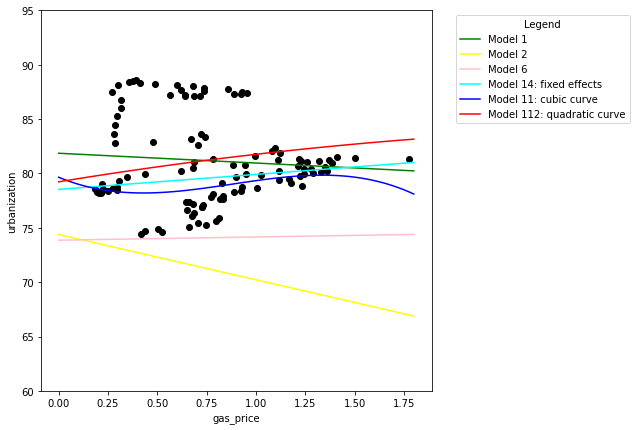

In [62]:
## plt.scatter(data_df2['gas_price'], data_df['urbanization'], color='black')
x42 = np.linspace(0, 1.8, 100)
y11 = params11['intercept'] + params11['gas_price']*x42 + \
    params11['gas_price^2']*x42**2 + params11['gas_price^3']*x42**3
y112 = params11_2['intercept'] + params11_2['gas_price']*x42 + \
    params11_2['gas_price^2']*x42**2
y1 = params1['intercept'] + params1['gas_price']*x42
y2 = params2['intercept'] + params2['gas_price']*x42
y6 = params6['intercept'] + params6['gas_price']*x42
y14 = params14['intercept'] + params14['gas_price']*x42

plt.figure(figsize=(7, 7))
plt.scatter(data_df2['gas_price'],
                      data_df['urbanization'], color='black')
p1, = plt.plot(x42, y1, label='Model 1', color='green')
p2, = plt.plot(x42, y2, label='Model 2', color='yellow')
p6, = plt.plot(x42, y6, label='Model 6', color='pink')
p14, = plt.plot(x42, y14, label='Model 14: fixed effects', color='cyan')
p11, = plt.plot(x42, y11, label='Model 11: cubic curve', color='blue')
p112, = plt.plot(x42, y112, label='Model 112: quadratic curve', color='red')
plt.xlabel('gas_price')
plt.ylabel('urbanization')
plt.ylim(60, 95)
# plt.legend()
plt.legend(handles=[p1, p2, p6, p14, p11, p112], title='Legend', bbox_to_anchor=(
    1.05, 1), loc='upper left')

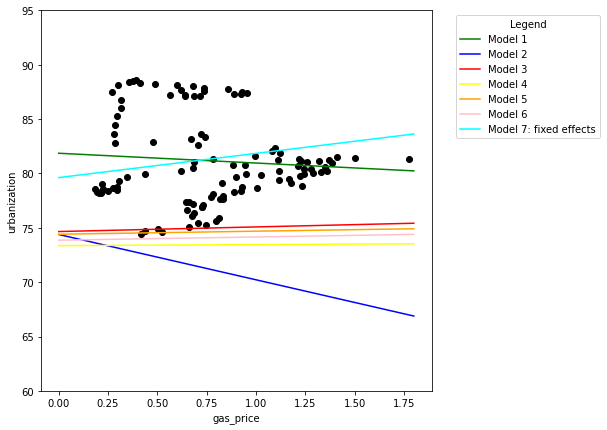

In [63]:
y1 = params1['intercept'] + params1['gas_price']*x42
y2 = params2['intercept'] + params2['gas_price']*x42
y3 = params3['intercept'] + params3['gas_price']*x42
y4 = params4['intercept'] + params4['gas_price']*x42
y5 = params5['intercept'] + params5['gas_price']*x42
y6 = params6['intercept'] + params6['gas_price']*x42
y7 = params7['intercept'] + params7['gas_price']*x42

plt.figure(figsize=(7, 7))
plt.scatter(data_df2['gas_price'],
                      data_df['urbanization'], color='black')
p1, = plt.plot(x42, y1, label='Model 1', color='green')
p2, = plt.plot(x42, y2, label='Model 2', color='blue')
p3, = plt.plot(x42, y3, label='Model 3', color='red')
p4, = plt.plot(x42, y4, label='Model 4', color='yellow')
p5, = plt.plot(x42, y5, label='Model 5', color='orange')
p6, = plt.plot(x42, y6, label='Model 6', color='pink')
p7, = plt.plot(x42, y7, label='Model 7: fixed effects', color='cyan')

plt.xlabel('gas_price')
plt.ylabel('urbanization')
plt.ylim(60, 95)
# plt.legend()
plt.legend(handles=[p1, p2, p3, p4, p5, p6, p7], title='Legend', bbox_to_anchor=(
    1.05, 1), loc='upper left')

### Including log(gdp) into model

In [64]:
data_df43 = data_df31.copy()
data_df43['log(gdp)'] = np.log(data_df43['gdp'])
data_df43

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,is_Canada,is_France,is_UK,gas_price^2,gas_price^3,is_USA,is_USA X gas_price,is_USA X gas_price^2,is_USA X gas_price^3,log(gdp)
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,0,0,0,0.082458,0.023678,1,0.287155,0.082458,0.023678,10.143252
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,0,0,0,0.079452,0.022395,1,0.281872,0.079452,0.022395,10.180638
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,0,0,0,0.080648,0.022903,1,0.283985,0.080648,0.022903,10.229002
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,0,0,0,0.086139,0.025282,1,0.293495,0.086139,0.025282,10.264334
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,0,0,0,0.100326,0.031777,1,0.316742,0.100326,0.031777,10.307876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,0,0,1,0.501648,0.355302,0,0.000000,0.000000,0.000000,10.713858
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,0,0,1,0.227374,0.108421,0,0.000000,0.000000,0.000000,10.622890
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,0,0,1,0.448518,0.300379,0,0.000000,0.000000,0.000000,10.605630
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,0,0,1,0.549289,0.407101,0,0.000000,0.000000,0.000000,10.669960


In [65]:
model15 = sm.OLS(data_df43['urbanization'], data_df43[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'log(gdp)', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_UK']])
res15 = model15.fit()
print(res15.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     284.5
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.25e-70
Time:                        17:13:00   Log-Likelihood:                -119.03
No. Observations:                 112   AIC:                             262.1
Df Residuals:                     100   BIC:                             294.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          76.4842      5.491     

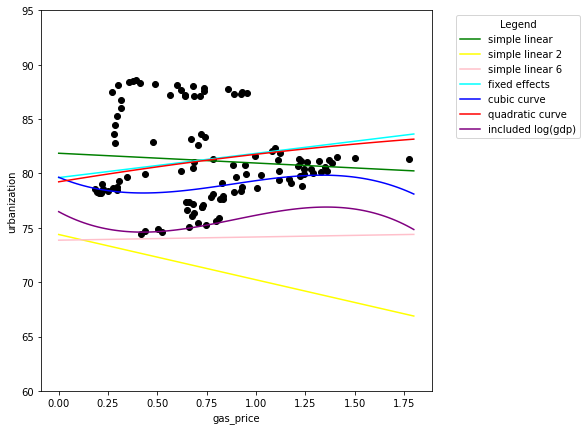

In [66]:
params15 = res15.params
y15 = params15['intercept'] + params15['gas_price']*x42 + \
    params15['gas_price^2']*x42**2 + params15['gas_price^3']*x42**3

plt.figure(figsize=(7, 7))
plt.scatter(data_df2['gas_price'],
                      data_df['urbanization'], color='black')
p1, = plt.plot(x42, y1, label='simple linear', color='green')
p2, = plt.plot(x42, y2, label='simple linear 2', color='yellow')
p6, = plt.plot(x42, y6, label='simple linear 6', color='pink')
p7, = plt.plot(x42, y7, label='fixed effects', color='cyan')
p11, = plt.plot(x42, y11, label='cubic curve', color='blue')
p112, = plt.plot(x42, y112, label='quadratic curve', color='red')
p15, = plt.plot(x42, y15, label='included log(gdp)', color='purple')
plt.xlabel('gas_price')
plt.ylabel('urbanization')
plt.ylim(60, 95)
# plt.legend()
plt.legend(handles=[p1, p2, p6, p7, p11, p112, p15], title='Legend', bbox_to_anchor=(
    1.05, 1), loc='upper left')

### Using logarithm models

#### ln(Y) ~ X

In [67]:
data_df441 = data_df41.copy()
data_df441['log(urbanization)'] = np.log(data_df441['urbanization'])
data_df441

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,...,gas_price^2,gas_price^3,is_USA X gas_price,is_USA X gas_price^2,is_USA X gas_price^3,is_USA,oil_consumption X gas_price,oil_consumption X gas_price^2,oil_consumption X gas_price^3,log(urbanization)
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,...,0.082458,0.023678,0.287155,0.082458,0.023678,1,4872.735846,1399.231223,401.796461,4.416295
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,...,0.079452,0.022395,0.281872,0.079452,0.022395,1,4837.200462,1363.469979,384.323618,4.426689
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,...,0.080648,0.022903,0.283985,0.080648,0.022903,1,5008.077064,1422.219216,403.889052,4.436574
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,...,0.086139,0.025282,0.293495,0.086139,0.025282,1,5175.789413,1519.069807,445.839831,4.445940
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,...,0.100326,0.031777,0.316742,0.100326,0.031777,1,5778.965819,1830.443734,579.779215,4.454847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,...,0.501648,0.355302,0.000000,0.000000,0.000000,0,1099.236284,778.556964,551.429165,4.414324
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,...,0.227374,0.108421,0.000000,0.000000,0.000000,0,761.510082,363.116847,173.147865,4.417466
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,...,0.448518,0.300379,0.000000,0.000000,0.000000,0,1078.240995,722.114065,483.610551,4.420562
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,...,0.549289,0.407101,0.000000,0.000000,0.000000,0,1173.966797,870.074521,644.847600,4.423624


In [68]:
model16 = sm.OLS(data_df441['log(urbanization)'], data_df441[[
                 'intercept', 'gas_price', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_UK', '1999_2005', '2006_2012', '2013_2019']])
res16 = model16.fit()
print(res16.summary())

                            OLS Regression Results                            
Dep. Variable:      log(urbanization)   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     281.7
Date:                Wed, 26 May 2021   Prob (F-statistic):           8.72e-71
Time:                        17:13:01   Log-Likelihood:                 379.23
No. Observations:                 112   AIC:                            -732.5
Df Residuals:                      99   BIC:                            -697.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           4.3794      0.036    1

#### Y ~ ln(X)

In [69]:
data_df442 = data_df41.copy()
data_df442['log(gas_price)'] = np.log(data_df442['gas_price'])
data_df442

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,...,gas_price^2,gas_price^3,is_USA X gas_price,is_USA X gas_price^2,is_USA X gas_price^3,is_USA,oil_consumption X gas_price,oil_consumption X gas_price^2,oil_consumption X gas_price^3,log(gas_price)
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,...,0.082458,0.023678,0.287155,0.082458,0.023678,1,4872.735846,1399.231223,401.796461,-1.247733
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,...,0.079452,0.022395,0.281872,0.079452,0.022395,1,4837.200462,1363.469979,384.323618,-1.266303
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,...,0.080648,0.022903,0.283985,0.080648,0.022903,1,5008.077064,1422.219216,403.889052,-1.258834
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,...,0.086139,0.025282,0.293495,0.086139,0.025282,1,5175.789413,1519.069807,445.839831,-1.225894
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,...,0.100326,0.031777,0.316742,0.100326,0.031777,1,5778.965819,1830.443734,579.779215,-1.149666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,...,0.501648,0.355302,0.000000,0.000000,0.000000,0,1099.236284,778.556964,551.429165,-0.344929
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,...,0.227374,0.108421,0.000000,0.000000,0.000000,0,761.510082,363.116847,173.147865,-0.740579
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,...,0.448518,0.300379,0.000000,0.000000,0.000000,0,1078.240995,722.114065,483.610551,-0.400903
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,...,0.549289,0.407101,0.000000,0.000000,0.000000,0,1173.966797,870.074521,644.847600,-0.299565


In [70]:
model17 = sm.OLS(data_df442['urbanization'], data_df442[[
                 'intercept', 'log(gas_price)', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_UK', '1999_2005', '2006_2012', '2013_2019']])
res17 = model17.fit()
print(res17.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     282.0
Date:                Wed, 26 May 2021   Prob (F-statistic):           8.28e-71
Time:                        17:13:01   Log-Likelihood:                -114.24
No. Observations:                 112   AIC:                             254.5
Df Residuals:                      99   BIC:                             289.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          79.5303      2.956     

#### ln(Y) ~ ln(X)

In [71]:
data_df443 = data_df41.copy()
data_df443['log(gas_price)'] = np.log(data_df443['gas_price'])
data_df443['log(urbanization)'] = np.log(data_df443['urbanization'])
data_df443

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,...,gas_price^3,is_USA X gas_price,is_USA X gas_price^2,is_USA X gas_price^3,is_USA,oil_consumption X gas_price,oil_consumption X gas_price^2,oil_consumption X gas_price^3,log(gas_price),log(urbanization)
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,...,0.023678,0.287155,0.082458,0.023678,1,4872.735846,1399.231223,401.796461,-1.247733,4.416295
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,...,0.022395,0.281872,0.079452,0.022395,1,4837.200462,1363.469979,384.323618,-1.266303,4.426689
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,...,0.022903,0.283985,0.080648,0.022903,1,5008.077064,1422.219216,403.889052,-1.258834,4.436574
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,...,0.025282,0.293495,0.086139,0.025282,1,5175.789413,1519.069807,445.839831,-1.225894,4.445940
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,...,0.031777,0.316742,0.100326,0.031777,1,5778.965819,1830.443734,579.779215,-1.149666,4.454847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,...,0.355302,0.000000,0.000000,0.000000,0,1099.236284,778.556964,551.429165,-0.344929,4.414324
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,...,0.108421,0.000000,0.000000,0.000000,0,761.510082,363.116847,173.147865,-0.740579,4.417466
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,...,0.300379,0.000000,0.000000,0.000000,0,1078.240995,722.114065,483.610551,-0.400903,4.420562
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,...,0.407101,0.000000,0.000000,0.000000,0,1173.966797,870.074521,644.847600,-0.299565,4.423624


In [72]:
model18 = sm.OLS(data_df443['log(urbanization)'], data_df443[[
                 'intercept', 'log(gas_price)', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_UK', '1999_2005', '2006_2012', '2013_2019']])
res18 = model18.fit()
print(res18.summary())

                            OLS Regression Results                            
Dep. Variable:      log(urbanization)   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     273.4
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.65e-70
Time:                        17:13:01   Log-Likelihood:                 377.61
No. Observations:                 112   AIC:                            -729.2
Df Residuals:                      99   BIC:                            -693.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           4.3917      0.037    1

#### Draw regression lines

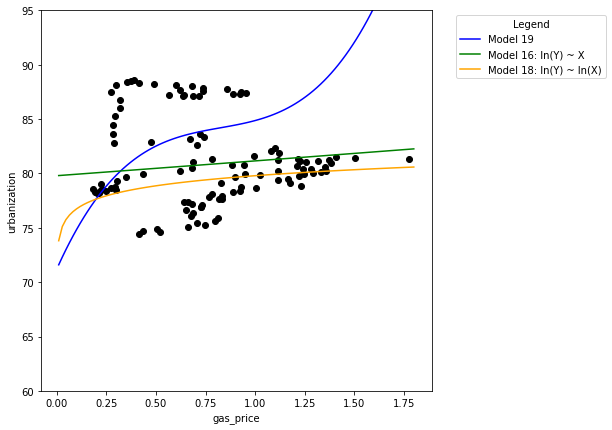

In [73]:
params16 = res16.params
params17 = res17.params
params18 = res18.params
params19 = res19.params

x42 = np.linspace(0.01, 1.8, 100)
y16 = np.exp(params16['intercept'] + params16['gas_price']*x42)
y17 = params16['intercept'] + params16['gas_price']*np.log(x42)
y18 = np.exp(params16['intercept'] + params16['gas_price']*np.log(x42))
y19 = params19['intercept'] + params19['gas_price']*x42 + \
    params19['gas_price^2']*x42**2 + params19['gas_price^3']*x42**3

plt.figure(figsize=(7, 7))
plt.scatter(data_df2['gas_price'],
            data_df['urbanization'], color='black')
p19, = plt.plot(x42, y19, label='Model 19', color='blue')
p16, = plt.plot(x42, y16, label='Model 16: ln(Y) ~ X', color='green')
p17, = plt.plot(x42, y17, label='Model 17: Y ~ ln(X)', color='red')
p18, = plt.plot(x42, y18, label='Model 18: ln(Y) ~ ln(X)', color='orange')

plt.xlabel('gas_price')
plt.ylabel('urbanization')
plt.ylim(60, 95)
# plt.legend()
plt.legend(handles=[p19, p16, p18], title='Legend', bbox_to_anchor=(
    1.05, 1), loc='upper left')

### Include continuous interaction effects

In [74]:
data_df45 = data_df31.copy()
data_df45['oil_consumption X gas_price'] = data_df45['oil_consumption']*data_df45['gas_price']
data_df45['oil_consumption X gas_price^2'] = data_df45['oil_consumption']*data_df45['gas_price^2']
data_df45['oil_consumption X gas_price^3'] = data_df45['oil_consumption']*data_df45['gas_price^3']
data_df45

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,...,is_UK,gas_price^2,gas_price^3,is_USA,is_USA X gas_price,is_USA X gas_price^2,is_USA X gas_price^3,oil_consumption X gas_price,oil_consumption X gas_price^2,oil_consumption X gas_price^3
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,...,0,0.082458,0.023678,1,0.287155,0.082458,0.023678,4872.735846,1399.231223,401.796461
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,...,0,0.079452,0.022395,1,0.281872,0.079452,0.022395,4837.200462,1363.469979,384.323618
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,...,0,0.080648,0.022903,1,0.283985,0.080648,0.022903,5008.077064,1422.219216,403.889052
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,...,0,0.086139,0.025282,1,0.293495,0.086139,0.025282,5175.789413,1519.069807,445.839831
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,...,0,0.100326,0.031777,1,0.316742,0.100326,0.031777,5778.965819,1830.443734,579.779215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,...,1,0.501648,0.355302,0,0.000000,0.000000,0.000000,1099.236284,778.556964,551.429165
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,...,1,0.227374,0.108421,0,0.000000,0.000000,0.000000,761.510082,363.116847,173.147865
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,...,1,0.448518,0.300379,0,0.000000,0.000000,0.000000,1078.240995,722.114065,483.610551
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,...,1,0.549289,0.407101,0,0.000000,0.000000,0.000000,1173.966797,870.074521,644.847600


In [75]:
model19 = sm.OLS(data_df45['urbanization'], data_df45[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_USA', 'is_USA X gas_price', 'is_USA X gas_price^2',
                 'is_USA X gas_price^3', 'oil_consumption X gas_price', 'oil_consumption X gas_price^2',
                 'oil_consumption X gas_price^3']])
res19 = model19.fit()
print(res19.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     250.5
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.09e-70
Time:                        17:13:02   Log-Likelihood:                -98.861
No. Observations:                 112   AIC:                             233.7
Df Residuals:                      94   BIC:                             282.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

### Check the sensitivity of replacing missing data  

In [76]:
# remove all artifical data
data_real = data_df[data_df['dates'] > 1999]
data_real

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept
8,2000,US,88.587,0.392032,36334.908777,225.82124,19594.0,22.454386,72.816234,1.0
9,2001,US,88.491,0.375124,37133.242809,235.33138,19534.0,21.473992,74.012379,1.0
10,2002,US,88.394,0.355312,38023.161114,234.62414,19625.0,20.641261,74.880532,1.0
11,2003,US,88.297,0.412373,39496.485875,236.76003,19848.0,20.739307,74.610615,1.0
12,2004,US,88.198,0.489247,41712.801068,243.01012,20499.0,20.960345,74.159275,1.0
...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0


In [77]:
model20 = sm.OLS(data_real['urbanization'], data_real[[
                 'intercept', 'gas_price', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services']])
res20 = model20.fit()
print(res20.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 26 May 2021   Prob (F-statistic):           8.36e-35
Time:                        17:13:02   Log-Likelihood:                -124.93
No. Observations:                  80   AIC:                             263.9
Df Residuals:                      73   BIC:                             280.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept         -18.9242     21.476     

In [78]:
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     119.8
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.20e-44
Time:                        17:13:02   Log-Likelihood:                -198.27
No. Observations:                 112   AIC:                             410.5
Df Residuals:                     105   BIC:                             429.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          73.8619      2.285     

In [80]:
data_df45

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,...,is_UK,gas_price^2,gas_price^3,is_USA,is_USA X gas_price,is_USA X gas_price^2,is_USA X gas_price^3,oil_consumption X gas_price,oil_consumption X gas_price^2,oil_consumption X gas_price^3
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,...,0,0.082458,0.023678,1,0.287155,0.082458,0.023678,4872.735846,1399.231223,401.796461
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,...,0,0.079452,0.022395,1,0.281872,0.079452,0.022395,4837.200462,1363.469979,384.323618
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,...,0,0.080648,0.022903,1,0.283985,0.080648,0.022903,5008.077064,1422.219216,403.889052
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,...,0,0.086139,0.025282,1,0.293495,0.086139,0.025282,5175.789413,1519.069807,445.839831
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,...,0,0.100326,0.031777,1,0.316742,0.100326,0.031777,5778.965819,1830.443734,579.779215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,...,1,0.501648,0.355302,0,0.000000,0.000000,0.000000,1099.236284,778.556964,551.429165
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,...,1,0.227374,0.108421,0,0.000000,0.000000,0.000000,761.510082,363.116847,173.147865
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,...,1,0.448518,0.300379,0,0.000000,0.000000,0.000000,1078.240995,722.114065,483.610551
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,...,1,0.549289,0.407101,0,0.000000,0.000000,0.000000,1173.966797,870.074521,644.847600


In [81]:
data_df45.to_csv('./cleaned_data/final_data_mod206.csv', index=False)